In [14]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = [json.loads(line) for line in open('Sarcasm_Headlines_Dataset.json', 'r')]
news_sentences=[]
labels=[]
urls=[]
for i in range(len(data)):
    labels.append(data[i]['is_sarcastic'])
    news_sentences.append(data[i]['headline'])
    urls.append(data[i]['article_link'])
print(len(labels))
print(len(news_sentences))
print(len(urls))    


26709
26709
26709


In [4]:
vocab_size=10000
oov_token='OOV'
trunc_type='post'
padd_type='post'
training_size=20000
max_length=32
embeddings_dim=16
Tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_token)

In [5]:
train_labels=labels[0:training_size]
test_labels=labels[training_size:]
train_sentences=news_sentences[0:training_size]
test_sentences=news_sentences[training_size:]

In [11]:
Tokenizer.fit_on_texts(train_sentences)
word_index=Tokenizer.word_index
train_sequences=Tokenizer.texts_to_sequences(train_sentences)
train_padded=pad_sequences(train_sequences,maxlen=max_length,truncating=trunc_type,padding=padd_type)
test_sequences=Tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences,maxlen=max_length,truncating=trunc_type,padding=padd_type)

In [13]:
print(len(train_padded),len(train_labels))
print(len(test_padded),len(test_labels))

20000 20000
6709 6709


In [15]:
train_labels=np.asarray(train_labels)
test_labels=np.asarray(test_labels)

In [16]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embeddings_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
z=model.fit(train_padded,train_labels,validation_data=(test_padded,test_labels),epochs=30)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 [==============================] - 3s 151us/sample - loss: 0.0661 - accuracy: 0.9803 - val_loss: 0.6162 - val_accuracy: 0.8335
Epoch 2/30
20000/20000 [==============================] - 3s 136us/sample - loss: 0.0578 - accuracy: 0.9826 - val_loss: 0.6648 - val_accuracy: 0.8283
Epoch 3/30
20000/20000 [==============================] - 3s 138us/sample - loss: 0.0510 - accuracy: 0.9855 - val_loss: 0.7180 - val_accuracy: 0.8272
Epoch 4/30
20000/20000 [==============================] - 3s 134us/sample - loss: 0.0449 - accuracy: 0.9866 - val_loss: 0.7715 - val_accuracy: 0.8237
Epoch 5/30
20000/20000 [==============================] - 3s 134us/sample - loss: 0.0395 - accuracy: 0.9890 - val_loss: 0.8152 - val_accuracy: 0.8229
Epoch 6/30
20000/20000 [==============================] - 3s 141us/sample - loss: 0.0349 - accuracy: 0.9903 - val_loss: 0.8961 - val_accuracy: 0.8193
Epoch 7/30
20000/20000 [===========================

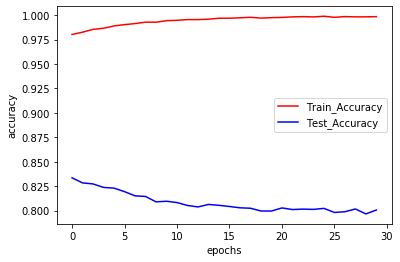

In [23]:
plt.plot(z.history['accuracy'],'r',label='Train_Accuracy')
plt.plot(z.history['val_accuracy'],'b',label='Test_Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()